In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
# Veri dosyasını oku
df = pd.read_csv("C:/Users/a/Desktop/Okul_dök/engworddosya/user_data.csv")
df = df.rename(columns={'kullanıcı_meslek': 'kullanıcı_medeni_durum'})

# İlk 5 satırı ekranda göster
df.head()


,username,password,kullanıcı_yas,kullanıcı_medeni_durum,gelir_seviyesi,yaşanıla_bolge,pdfdata,pdf_icerk,Pdfdata_kolay_words,Pdfdata_orta_words,Pdfdata_zor_words
0,gir1,123,20,bekar,2000,iç anadolu,im feeling rather rotten so im not very ambiti...,"sadness; 0,45","[very, when, not, her, now, me, from, because,...",[ashamed],[]
1,gir2,123,22,bekar,3000,iç anadolu,i feel like my only role now would be to tear ...,"sadness; 0,46","[but, tell, had, your, that, would, only, you,...",[ashamed],[]
2,gir3,123,24,bekar,2500,iç anadolu,i stole a book from one of my all time favorit...,"sadness; 0,43","[that, from, because, all, last, like, my, som...",[],[]
3,gir4,123,45,bekar,10000,Akdeniiz,\ni can feel that they are kind friendly and ...,"happy; 0,15","[can, that, into, world, are, too, and, of, me...",[],[]
4,gir5,123,50,bekar,50000,Akdeniiz,i am running at an approximate minute pace whi...,"happy; 0,15","[very, been, they, in, made, is, them, it, am,...",[approximate],[]


## pdf_içerik kolonunun yeniden düzenlenmesi

In [2]:
import tensorflow as tf 
import keras
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
train=pd.read_table('train.txt', delimiter = ';', header=None, )
val=pd.read_table('val.txt', delimiter = ';', header=None, )
test=pd.read_table('test.txt', delimiter = ';', header=None, )

data = pd.concat([train ,  val , test])
data.columns = ["text", "label"]

with open('train.txt', 'r') as file:
    text_samples = []
    emotion_labels = []
    for line in file:
        sample, label = line.strip().split(';')
        text_samples.append(sample)
        emotion_labels.append(label)
emotion_labels = list(set(emotion_labels))

data.isna().any(axis=1).sum()

ps = PorterStemmer()

def preprocess(line):
    review = re.sub('[^a-zA-Z]', ' ', line) #leave only characters from a to z
    review = review.lower() #lower the text
    review = review.split() #turn string into list of words
    #apply Stemming 
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] #delete stop words like I, and ,OR   review = ' '.join(review)
    #trun list into sentences
    return " ".join(review)

data['text']=data['text'].apply(lambda x: preprocess(x))

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['N_label'] = label_encoder.fit_transform(data['label'])


from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=5000,ngram_range=(1,3))#example: the course was long-> [the,the course,the course was,course, course was, course was long,...]

data_cv = cv.fit_transform(data['text']).toarray()


In [3]:
import numpy as np
model = keras.models.load_model('my_model.h5')
# Veri çerçevesindeki her bir pdf_icerik verisini döngüyle işleyin
for index, row in df.iterrows():
    text = row['pdf_icerk']  # pdf_icerik kolonunun adını doğru şekilde belirtin
    text = preprocess(text)
    array = cv.transform([text]).toarray()
    pred = model.predict(array)
    a = np.argmax(pred, axis=1)
    prediction = label_encoder.inverse_transform(a)[0]

    # Tahmin sonucunu pdf_icerik ile yer değiştirin
    df.loc[index, 'pdf_icerk'] = prediction
#df.drop('prediction', axis=1, inplace=True)



1/1 [==============================] - 0s 15ms/step


# Doğru şekilde duygu analizi yapılmış veri çerçevemiz hazır

In [4]:
df.head()

,username,password,kullanıcı_yas,kullanıcı_medeni_durum,gelir_seviyesi,yaşanıla_bolge,pdfdata,pdf_icerk,Pdfdata_kolay_words,Pdfdata_orta_words,Pdfdata_zor_words
0,gir1,123,20,bekar,2000,iç anadolu,im feeling rather rotten so im not very ambiti...,anger,"[very, when, not, her, now, me, from, because,...",[ashamed],[]
1,gir2,123,22,bekar,3000,iç anadolu,i feel like my only role now would be to tear ...,anger,"[but, tell, had, your, that, would, only, you,...",[ashamed],[]
2,gir3,123,24,bekar,2500,iç anadolu,i stole a book from one of my all time favorit...,anger,"[that, from, because, all, last, like, my, som...",[],[]
3,gir4,123,45,bekar,10000,Akdeniiz,\ni can feel that they are kind friendly and ...,joy,"[can, that, into, world, are, too, and, of, me...",[],[]
4,gir5,123,50,bekar,50000,Akdeniiz,i am running at an approximate minute pace whi...,joy,"[very, been, they, in, made, is, them, it, am,...",[approximate],[]


Aşağıdaki grafikte 20-25 yaş aralığındaki insanların daha düşük gelir seviyeseine sahip olduğunu gördük

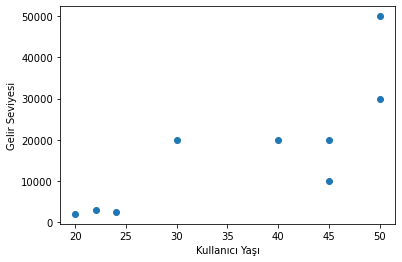

In [5]:
# Nokta grafiği oluştur
plt.scatter(df["kullanıcı_yas"], df["gelir_seviyesi"])


# Eksenleri adlandır ve grafiği göster
plt.xlabel("Kullanıcı Yaşı")
plt.ylabel("Gelir Seviyesi")
plt.show()

bölgelere göre gelir seviyelerine baktığımızda akdeniz ve ege bölgesinde yaşayan kullanıcıların gelir seviyeleri yüksek fakat iç anadolu bölgesinde yaşayan insanların gelir seviyeleri düşük olduğıunu görüyoruz, ileride uygulamamıza premium paketi ekleyerceğimiz için içanadolu bölgesindeki BELİRLİ insanlara indirim yapabiliriz peki kimdir bu belirli insanlar bunu grafiklerle anlamaya çalışalım

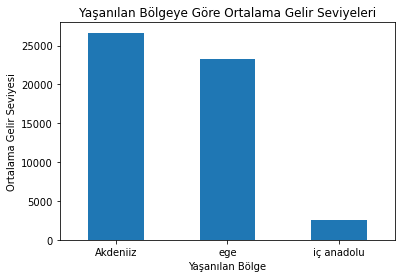

In [6]:

# pdf_icerk sütunundaki verileri ortak string ifadesine göre grupla ve grup ismini veriye ekle
df["pdf_icerk_gruplu"] = df["pdf_icerk"].apply(lambda x: x.split()[0])
df["pdf_icerk_gruplu"] = df.groupby("pdf_icerk_gruplu").ngroup()
df["pdf_icerk_gruplu"] = df["pdf_icerk_gruplu"].apply(lambda x: "Grup " + str(x))

# Yaşanılan bölgeye göre gruplanmış gelir seviyeleri için çubuk grafik oluştur
df.groupby("yaşanıla_bolge")["gelir_seviyesi"].mean().plot(kind="bar", rot=0)
plt.title("Yaşanılan Bölgeye Göre Ortalama Gelir Seviyeleri")
plt.xlabel("Yaşanılan Bölge")
plt.ylabel("Ortalama Gelir Seviyesi")
plt.show()




aşağıdaki grafikten de anlaşılacağı gibi iç anadolu bilgesinde indirim yapacağımız BELİRLİ kişiler bekar ve gelir seviyesi düşük kişiler olacak 

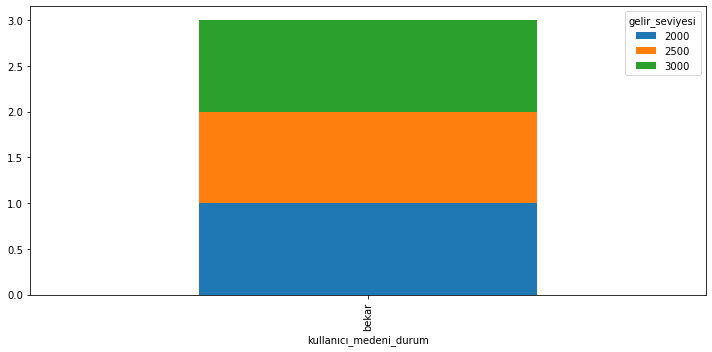

In [7]:

# İç Anadolu bölgesinde yaşayan kullanıcılar
df_ia = df[df["yaşanıla_bolge"] == "iç anadolu"]


# Medeni duruma göre gelir seviyesi dağılımını gösteren bar grafik oluştur
fig, axs = plt.subplots(figsize=(10, 5))
df_ia.groupby("kullanıcı_medeni_durum")["gelir_seviyesi"].value_counts().unstack().plot(ax=axs, kind="bar", stacked=True)
plt.tight_layout()
plt.show()


# PDF verileri ve analiz edilen kelimeleri kıyaslayarak, analiz edilememiş kelimeleri bulacağız

### Pdfdata_kolay_words Pdfdata_orta_words Pdfdata_zor_words klonlarındaki kelimeleri tek bir dizi içerisinde toplayacağız

In [8]:
# Pdfdata_kolay_words, Pdfdata_orta_words, Pdfdata_zor_words kolonlarını birleştir
merged_data = df['Pdfdata_kolay_words'].astype(str) + df['Pdfdata_orta_words'].astype(str) + df['Pdfdata_zor_words'].astype(str)

# Tüm verileri tek bir string olarak topla
result = ''.join(merged_data)


In [9]:
pattern_brackets = r'\[|\]'
pattern_comma = r','
pattern_invalid = r'[^\w\s]'
result = re.sub(pattern_brackets, '', result)
result = re.sub(pattern_comma, '', result)
result = re.sub(pattern_invalid, '', result)


In [10]:
import spacy

nlp = spacy.load("en_core_web_sm")

# İsim olarak tanımlanamayan kelimeleri saklamak için bir liste oluşturun
analizedlms = []

# String'i kelime kümelerine ayırın ve her kelime için bir analiz yapın
for kelime in nlp(result):
    # Eğer kelime bir isim değilse, analizedilmeyen listesine ekle
    if not kelime.pos_ == 'PROPN' and not kelime.pos_ == 'NOUN':
        analizedlms.append(kelime.text)

# Sonuçları gösterin
print("Analiz edilmis kelimeler: ", analizedlms)

Analiz edilmis kelimeler:  ['very', 'when', 'not', 'her', 'now', 'me', 'from', 'because', 'so', 'make', 'a', 'like', 'was', 'this', 'i', 'right', 'my', 'never', 'with', 'as', 'to', 'did', 'littleashamedbut', 'tell', 'had', 'your', 'that', 'would', 'only', 'you', 'still', 'like', 'in', 'this', 'is', 'it', 'my', 'at', 'anyone', 'who', 'be', 'away', 'for', 'not', 'and', 'now', 'of', 'have', 'a', 'or', 'may', 'will', 'go', 'i', 'also', 'the', 'with', 'what', 'able', 'from', 'because', 'all', 'last', 'like', 'my', 'something', 'be', 'for', 'two', 'not', 'same', 'and', 'of', 'now', 'have', 'a', 'or', 'will', 'one', 'i', 'the', 'tocan', 'that', 'into', 'are', 'too', 'and', 'of', 'me', 'so', 'make', 'they', 'those', 'a', 'in', 'like', 'i', 'my', 'been', 'they', 'in', 'made', 'is', 'them', 'it', 'am', 'an', 'at', 'other', 'be', 'two', 'are', 'get', 'by', 'have', 'so', 'a', 'more', 'i', 'people', 'off', 'the', 'able', 'to', 'first', 'but', 'do', 'that', 'than', 'me', 'which', 'like', 'this', 'my

### şimdi pdfdata kolonunda bulunan pdf verilerini tek bir string içinde topladık  

In [11]:
toplam = ''.join(df['pdfdata'].astype(str).tolist())


### toplanan bu string veri içerisinde analiz edilememiş kelimeleri arayacağız

In [12]:
not_in_result = []

# Her kelimeyi döngüde kontrol et
for word in analizedlms:
    # Eğer kelime sonucun içinde değilse, listeye ekle
    if word not in toplam.split():
        not_in_result.append(word)

# Sonucu yazdır
print(not_in_result)

['littleashamedbut', 'tocan', 'withapproximateyour', 'didbut']
